In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('../data/clean_metrics_18_22.csv')
df.sample(random_state=538)

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year
2960,"Sarasota County, dba: Sarasota County Area Tra...",Sarasota,FL,40046,"City, County or Local Government Unit or Depar...",Full Reporter,643260.00,107.00,MB,DO,48.00,0.42,0.04,112.75,11.20,2.15,752068.00,19981780.00,1784754.00,177228.00,9294999.00,2536060.00,2020


In [3]:
conv = {
    'HR': 'Heavy Rail',
    'CB': 'Commuter Bus',
    'MB': 'Bus',
    'DR': 'Demand Response',
    'RB': 'Bus Rapid Transit',
    'LR': 'Light Rail',
    'VP': 'Vanpool',
    'YR': 'Hybrid Rail',
    'CR': 'Commuter Rail',
    'DT': 'Demand Response Taxi',
    'FB': 'Ferryboat',
    'TB': 'Trolleybus',
    'SR': 'Streetcar Rail',
    'PB': 'Publico',
    'MG': 'Monorail/Automated Guideway',
    'CC': 'Cable Car',
    'IP': 'Inclined Plane',
    'TR': 'Aerial Tramway',
    'AR': 'Alaska Railroad',
    'nan': 'nan',
    'UZA': 'Urbanized Area',
    'JT': 'Jitney',
    'Q': 'Questionable',
    'W': 'Waived'
}

df['mode_name'] = df['mode'].apply(lambda x: conv[x] if x in conv else x)

Remove NaN values.

In [4]:
def drop_cols(col, df):
    df_len = len(df)
    df = df.dropna(subset=[col])
    print(f'Dropped {df_len - len(df)} rows for having null {col}')
    return df

df = drop_cols('city', df)
df = drop_cols('passenger_miles', df)
df = drop_cols('cost_per_passenger_mile', df)

Dropped 0 rows for having null city
Dropped 0 rows for having null passenger_miles
Dropped 0 rows for having null cost_per_passenger_mile


Ridership overview.

In [5]:
df \
    .loc[:, ['city', 'year', 'mode_name', 'passenger_miles']] \
    .sort_values('passenger_miles', ascending=False).head(10)

,city,year,mode_name,passenger_miles
1261,New York,2019,Heavy Rail,10462782577.00
0,New York,2018,Heavy Rail,9989099073.00
4810,Brooklyn,2022,Heavy Rail,7055402031.00
3637,Brooklyn,2021,Heavy Rail,5668693486.00
2480,Brooklyn,2020,Heavy Rail,4676670633.00
1371,Jamaica,2019,Commuter Rail,3929859957.00
116,Jamaica,2018,Commuter Rail,3405961936.00
93,New York,2018,Commuter Rail,2154521183.00
12,Newark,2018,Commuter Rail,2148639449.00
1355,New York,2019,Commuter Rail,2034489613.00


In [6]:
df \
    .loc[:, ['city', 'year', 'mode_name', 'passenger_miles']] \
    .sort_values('passenger_miles', ascending=False).tail(10)

,city,year,mode_name,passenger_miles
4599,Minneapolis,2021,Demand Response,332.00
4515,Altoona,2021,Demand Response,308.00
5579,San Juan,2022,Demand Response,269.00
4295,San Juan,2021,Demand Response,249.00
1100,Iowa City,2018,Bus,225.00
4206,Modesto,2021,Demand Response,192.00
5811,Altoona,2022,Demand Response,133.00
1120,Zephyr Cove,2018,Demand Response Taxi,103.00
4903,Arlington Heights,2022,Demand Response,94.00
2289,Williamsport,2019,Demand Response,47.00


<Axes: xlabel='year'>

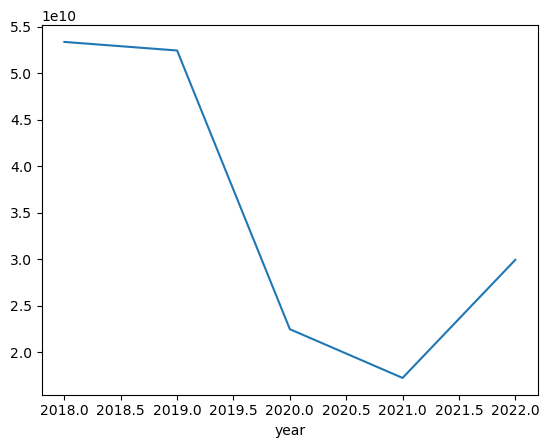

In [7]:
df.groupby('year').passenger_miles.sum().plot()

Cost outliers

In [8]:
df \
    .loc[:, ['city', 'year', 'mode_name', 'cost_per_passenger_mile']] \
    .sort_values('cost_per_passenger_mile', ascending=False)

,city,year,mode_name,cost_per_passenger_mile
2613,Woodbridge,2020,Demand Response,963.30
4795,Detroit,2021,Streetcar Rail,802.43
4599,Minneapolis,2021,Demand Response,653.42
5483,Oklahoma City,2022,Ferryboat,244.35
4206,Modesto,2021,Demand Response,174.35
...,...,...,...,...
517,State College,2018,Vanpool,0.07
141,San Antonio,2018,Vanpool,0.06
1862,Greensboro,2019,Vanpool,0.06
633,Greensboro,2018,Vanpool,0.06


Delete extreme outliers

In [9]:
# Check Modesto Commuter bus
display(df[(df.city == 'Modesto') & (df.mode_name == 'Commuter Bus')] \
    .loc[:, ['city', 'year', 'cost_per_passenger_mile']] )

# Drop Modesto Commuter bus
df = df[(df.city != 'Modesto') | (df.mode_name != 'Commuter Bus')]

,city,year,cost_per_passenger_mile


In [10]:
len_df = len(df)
dropped_rows = df[df.cost_per_passenger_mile == 0].copy()
df = df[df.cost_per_passenger_mile > 0]
print(f'Dropped {len_df - len(df)} rows for having zero cost per passenger mile')
print(f'Breakdown of dropped rows:')
dropped_rows.groupby(['year', 'mode_name']).size()

Dropped 0 rows for having zero cost per passenger mile
Breakdown of dropped rows:


Series([], dtype: int64)

Cost overview.

In [11]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name
5067,Transportation District Commission of Hampton ...,Hampton,VA,30083,Independent Public Agency or Authority of Tran...,Full Reporter,1451578.00,348.00,LR,DO,5.00,1.24,0.07,456.52,18.32,5.76,867637.00,12850194.00,701471.00,28148.00,2230802.00,345104.00,2022,Light Rail


<Axes: xlabel='year'>

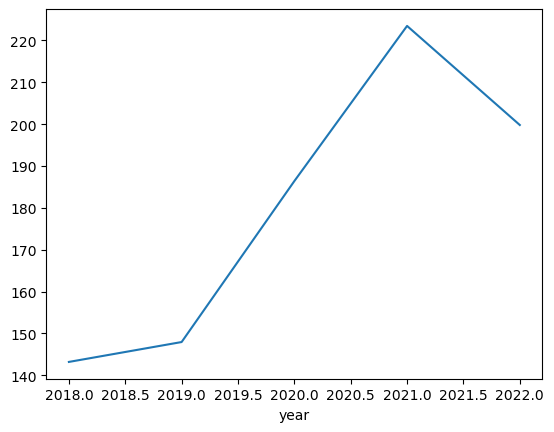

In [12]:
df.groupby('year').cost_per_hour.mean().plot()

In [63]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name,miles_per_expense
4457,Concho Valley Transit District,San Angelo,TX,60102,Independent Public Agency or Authority of Tran...,Full Reporter,92984.00,38.00,MB,DO,8.00,0.43,0.04,76.57,11.87,1.41,68859.00,1887409.00,159073.00,24648.00,1343165.00,395323.00,2021,Bus,0.71


<Axes: xlabel='year'>

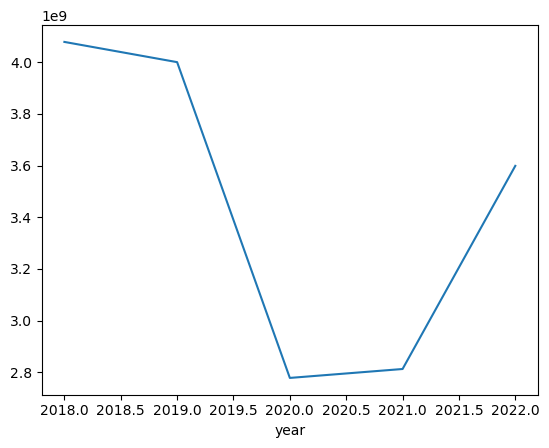

In [64]:
df.groupby('year').vehicle_revenue_miles.sum().plot()

<Axes: xlabel='year'>

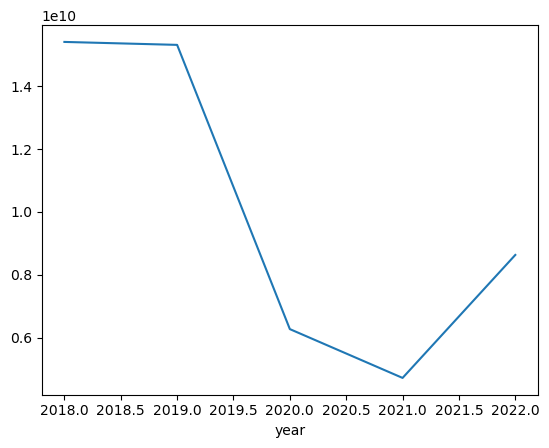

In [13]:
df.groupby('year').fare_revenues_earned.sum().plot()

<Axes: xlabel='year'>

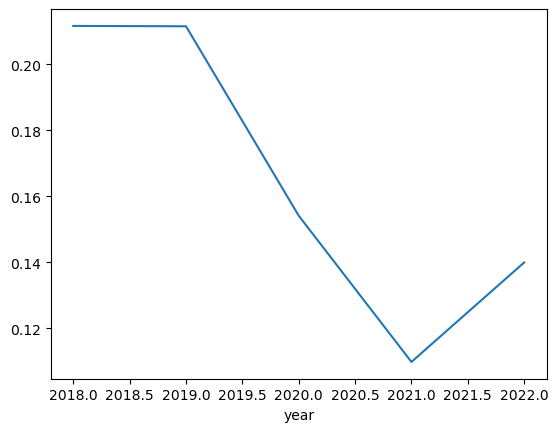

In [14]:
df.groupby('year')['fare_revenues_per_total_operating_expense_(recovery_ratio)'].mean().plot()

<Axes: xlabel='year'>

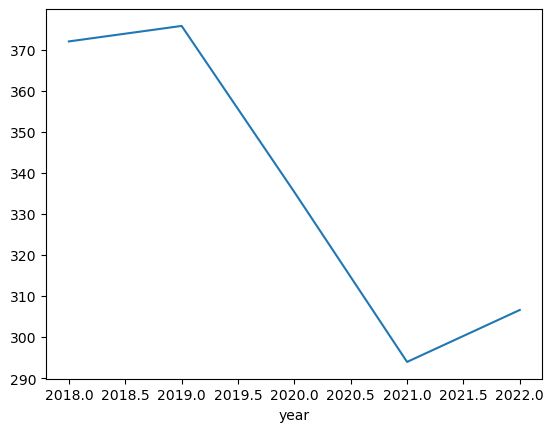

In [15]:
df.groupby('year')['agency_voms'].mean().plot()

<Axes: xlabel='year'>

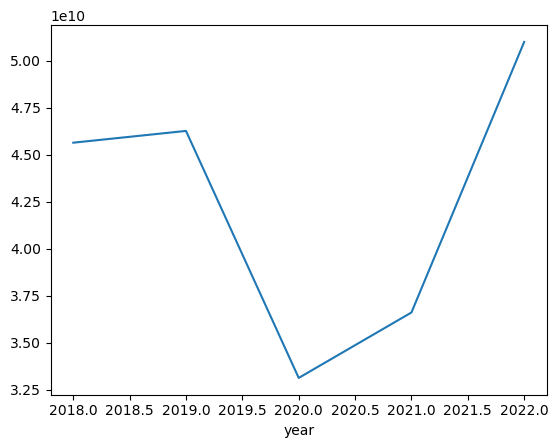

In [16]:
df.groupby('year')['total_operating_expenses'].sum().plot()

<Axes: xlabel='year'>

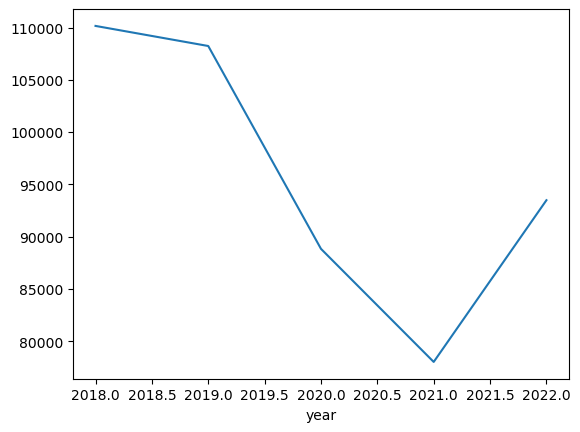

In [17]:
df.groupby('year')['mode_voms'].sum().plot()

In [18]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name
4402,Housatonic Area Regional Transit,Danbury,CT,10051,Independent Public Agency or Authority of Tran...,Full Reporter,168136.00,43.00,MB,DO,29.00,0.67,0.04,111.20,16.99,2.50,244137.00,6225316.00,366378.00,55984.00,2491370.00,926362.00,2021,Bus


<Axes: xlabel='year'>

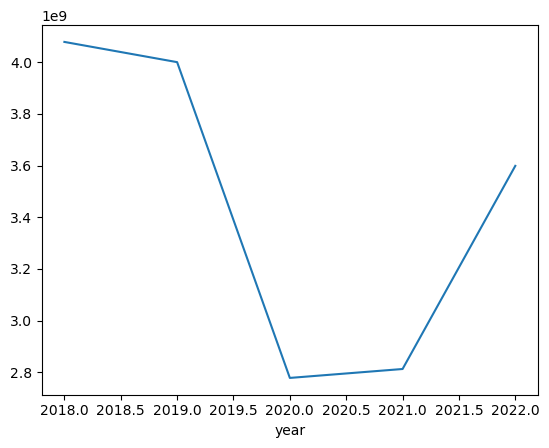

In [19]:
df.groupby('year')['vehicle_revenue_miles'].sum().plot()

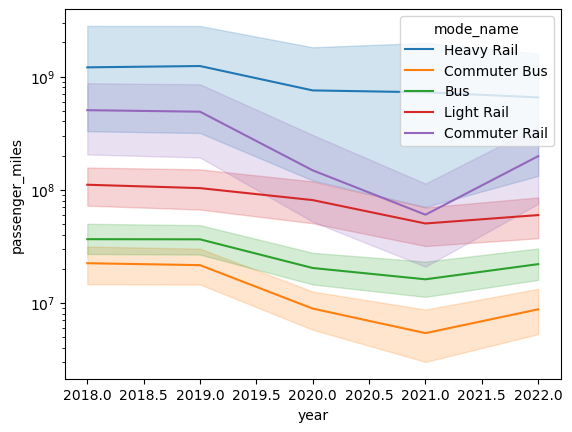

In [68]:
sns.lineplot(
    data=df[df.mode_name.isin(['Bus', 'Commuter Bus', 'Heavy Rail', 'Light Rail', 'Commuter Rail'])], 
    x='year', y='passenger_miles', hue='mode_name')
plt.yscale('log')
plt.show()

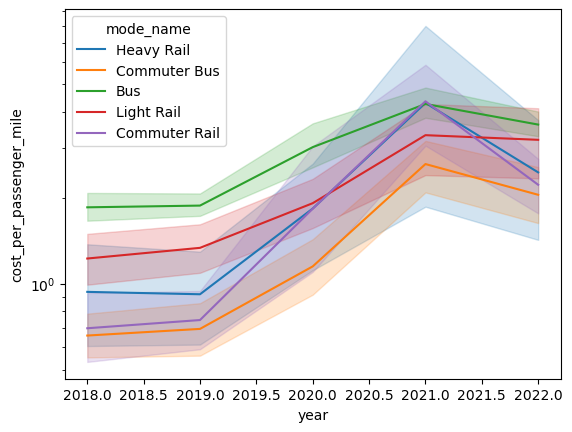

In [21]:
sns.lineplot(
    data=df[df.mode_name.isin(['Bus', 'Commuter Bus', 'Heavy Rail', 'Light Rail', 'Commuter Rail'])], 
    x='year', y='cost_per_passenger_mile', hue='mode_name')
plt.yscale('log')
plt.show()

In [22]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name
5114,Spokane Transit Authority,Spokane,WA,2,Independent Public Agency or Authority of Tran...,Full Reporter,447279.00,279.00,DR,PT,32.00,0.52,0.01,99.54,42.38,4.98,73585.00,6043883.00,142612.00,60719.00,1214452.00,945068.00,2022,Demand Response


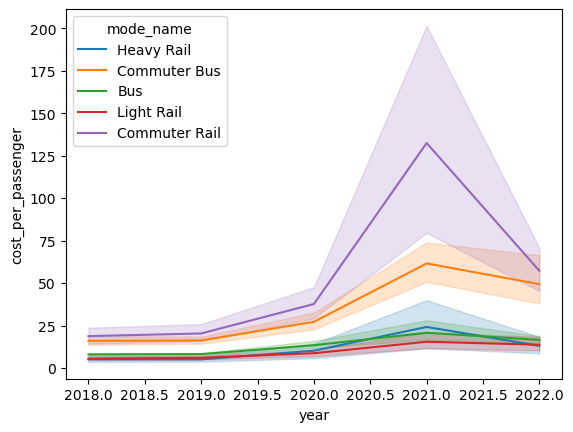

In [23]:
sns.lineplot(
    data=df[df.mode_name.isin(['Bus', 'Commuter Bus', 'Heavy Rail', 'Light Rail', 'Commuter Rail'])], 
    x='year', y='cost_per_passenger', hue='mode_name')
# plt.yscale('log')
plt.show()

In [24]:
!pip install squarify

In [61]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name,miles_per_expense
4523,"City of Fairfield, California, dba: Fairfield ...",Fairfield,CA,90092,"City, County or Local Government Unit or Depar...",Full Reporter,133683.00,32.00,DR,PT,4.00,1.92,0.01,268.43,173.06,16.99,12138.00,1096001.00,6333.00,4083.00,64491.00,56078.00,2021,Demand Response,0.06


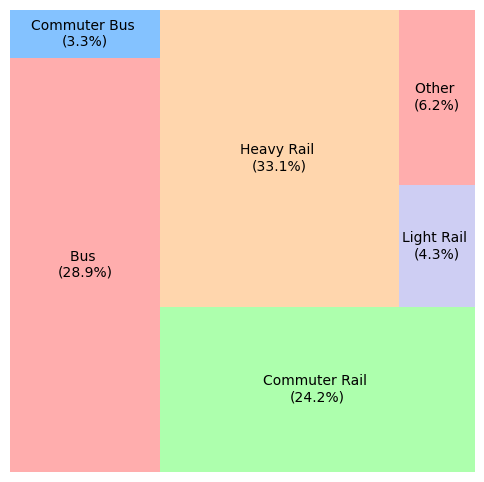

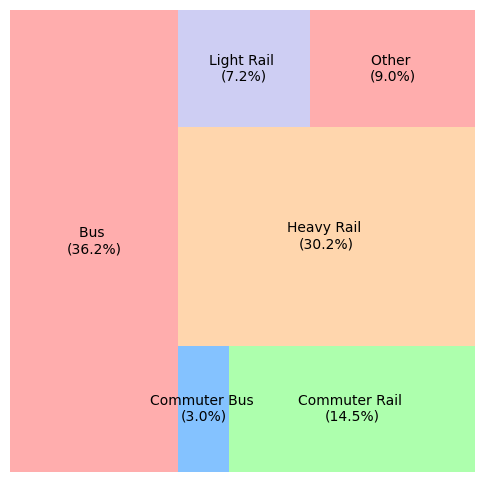

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


def group_for_area(col, year, df):
    year_filtered_df = df[df['year'] == year].copy()
    modes = {'Bus', 'Commuter Bus', 'Heavy Rail', 'Light Rail', 'Commuter Rail'}
    year_filtered_df['square_mode_name'] = year_filtered_df.mode_name
    year_filtered_df.square_mode_name = year_filtered_df.square_mode_name.apply(lambda x: 'Other' if x not in modes else x)
    grouped_df = year_filtered_df.groupby('square_mode_name')[col].sum().reset_index()
    grouped_df['share'] = grouped_df[col] / grouped_df[col].sum()
    grouped_df['square_mode_name'] = grouped_df['square_mode_name'] + ' \n(' + (grouped_df['share'] * 100).round(1).astype(str) + '%)'
    return grouped_df


colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']  # Custom color palette
grouped_df = group_for_area('passenger_miles', 2019, df)
plt.figure(figsize=(6, 6))
squarify.plot(sizes=grouped_df['share'], label=grouped_df['square_mode_name'], alpha=.8, color=colors)
plt.axis('off')
plt.show()

# grouped_df = group_for_area('passenger_miles', 2020, df)
# plt.figure(figsize=(6, 6))
# squarify.plot(sizes=grouped_df['share'], label=grouped_df['square_mode_name'], alpha=.8, color=colors)
# plt.axis('off')
# plt.show()

# grouped_df = group_for_area('passenger_miles', 2021, df)
# plt.figure(figsize=(6, 6))
# squarify.plot(sizes=grouped_df['share'], label=grouped_df['square_mode_name'], alpha=.8, color=colors)
# plt.axis('off')
# plt.show()

grouped_df = group_for_area('passenger_miles', 2020, df)
plt.figure(figsize=(6, 6))
squarify.plot(sizes=grouped_df['share'], label=grouped_df['square_mode_name'], alpha=.8, color=colors)
plt.axis('off')
plt.show()

In [26]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name
4032,Denton County Transportation Authority,Lewisville,TX,60101,Independent Public Agency or Authority of Tran...,Full Reporter,366174.00,141.00,MB,DO,35.00,3.70,0.22,128.86,16.82,6.90,2537872.00,11555180.00,686796.00,89675.00,1675782.00,1190682.00,2021,Bus


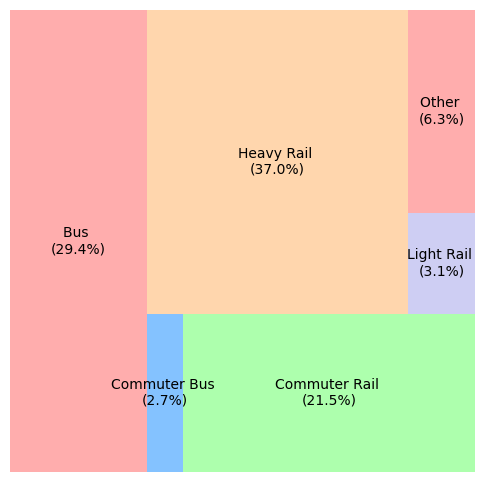

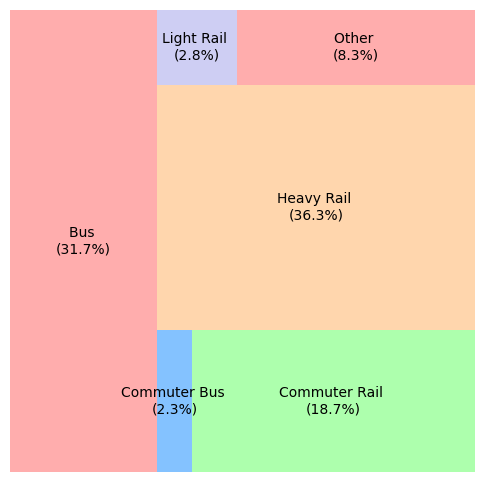

In [27]:
grouped_df = group_for_area('fare_revenues_earned', 2019, df)
plt.figure(figsize=(6, 6))
squarify.plot(sizes=grouped_df['share'], label=grouped_df['square_mode_name'], alpha=.8, color=colors)
plt.axis('off')
plt.show()

grouped_df = group_for_area('fare_revenues_earned', 2022, df)
plt.figure(figsize=(6, 6))
squarify.plot(sizes=grouped_df['share'], label=grouped_df['square_mode_name'], alpha=.8, color=colors)
plt.axis('off')
plt.show()

Which modes have bounced back the most in terms of ridership?

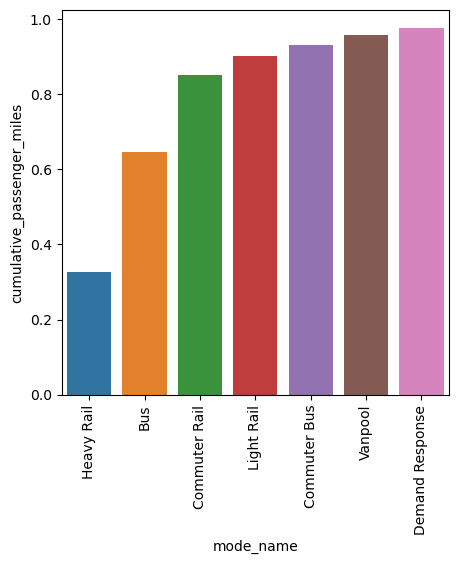

In [28]:
col = 'passenger_miles'
topn = 7

group = df.groupby(['mode_name'])[col].sum().sort_values(ascending=False).reset_index()
total_miles = group[col].sum()
group[f'cumulative_{col}'] = group[col].cumsum() / total_miles

group = group.head(topn)

plt.figure(figsize=(5, 5))
sns.barplot(group, x='mode_name', y=f'cumulative_{col}')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()

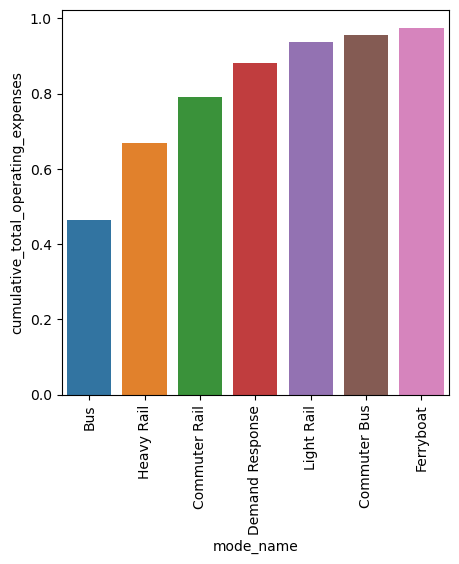

In [29]:
col = 'total_operating_expenses'
topn = 7

group = df.groupby(['mode_name'])[col].sum().sort_values(ascending=False).reset_index()
total_miles = group[col].sum()
group[f'cumulative_{col}'] = group[col].cumsum() / total_miles

group = group.head(topn)

plt.figure(figsize=(5, 5))
sns.barplot(group, x='mode_name', y=f'cumulative_{col}')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()

In [30]:
# df.groupby()

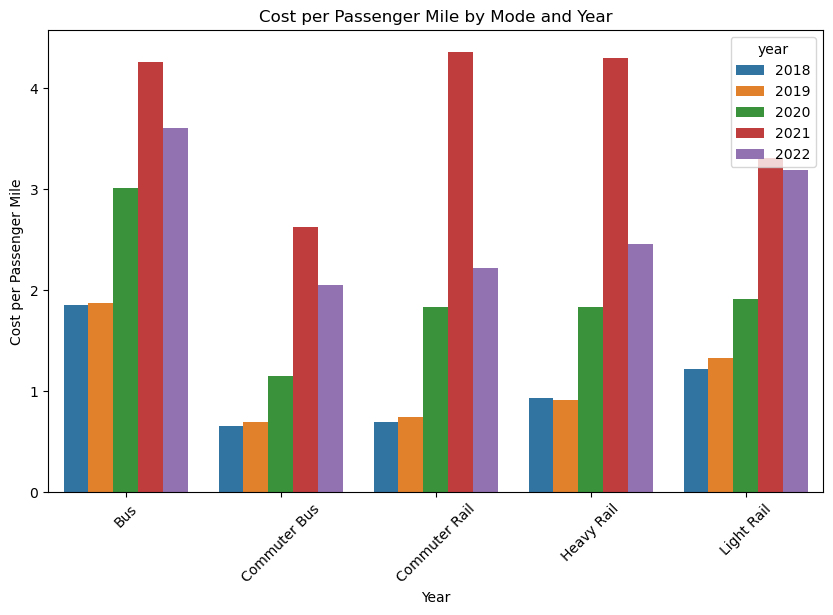

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

cdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail', 'Bus', 'Commuter Bus'])]
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data = cdf.groupby(['mode_name', 'year'])['cost_per_passenger_mile'].mean().reset_index()

bar_plot = sns.barplot(x='mode_name', y='cost_per_passenger_mile', hue='year', data=grouped_data, ax=ax)

plt.xticks(rotation=45)

ax.set_xlabel('Year')
ax.set_ylabel('Cost per Passenger Mile')
ax.set_title('Cost per Passenger Mile by Mode and Year')

plt.show()

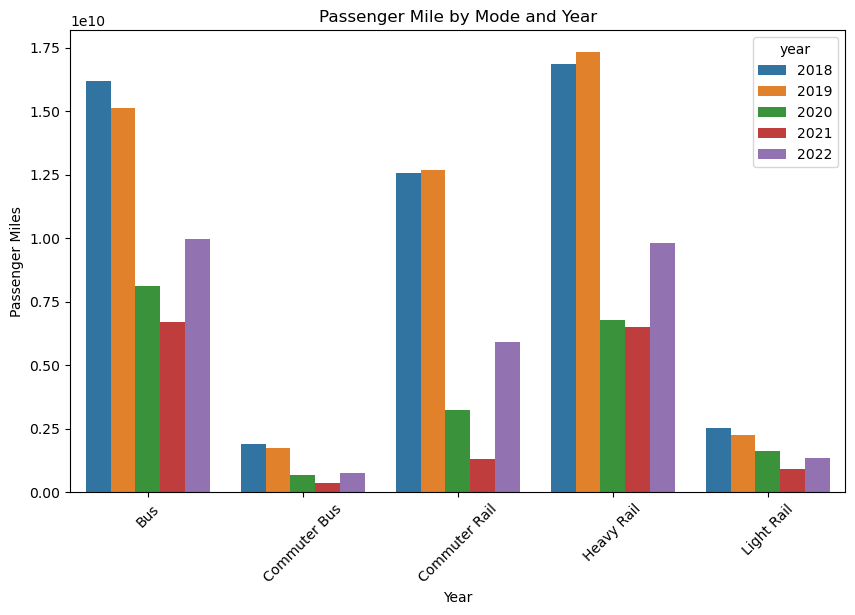

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

cdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail', 'Bus', 'Commuter Bus'])]
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data = cdf.groupby(['mode_name', 'year'])['passenger_miles'].sum().reset_index()

bar_plot = sns.barplot(x='mode_name', y='passenger_miles', hue='year', data=grouped_data, ax=ax)

plt.xticks(rotation=45)

ax.set_xlabel('Year')
ax.set_ylabel('Passenger Miles')
ax.set_title('Passenger Mile by Mode and Year')

plt.show()

<Axes: xlabel='mode_name', ylabel='cost_per_passenger_mile'>

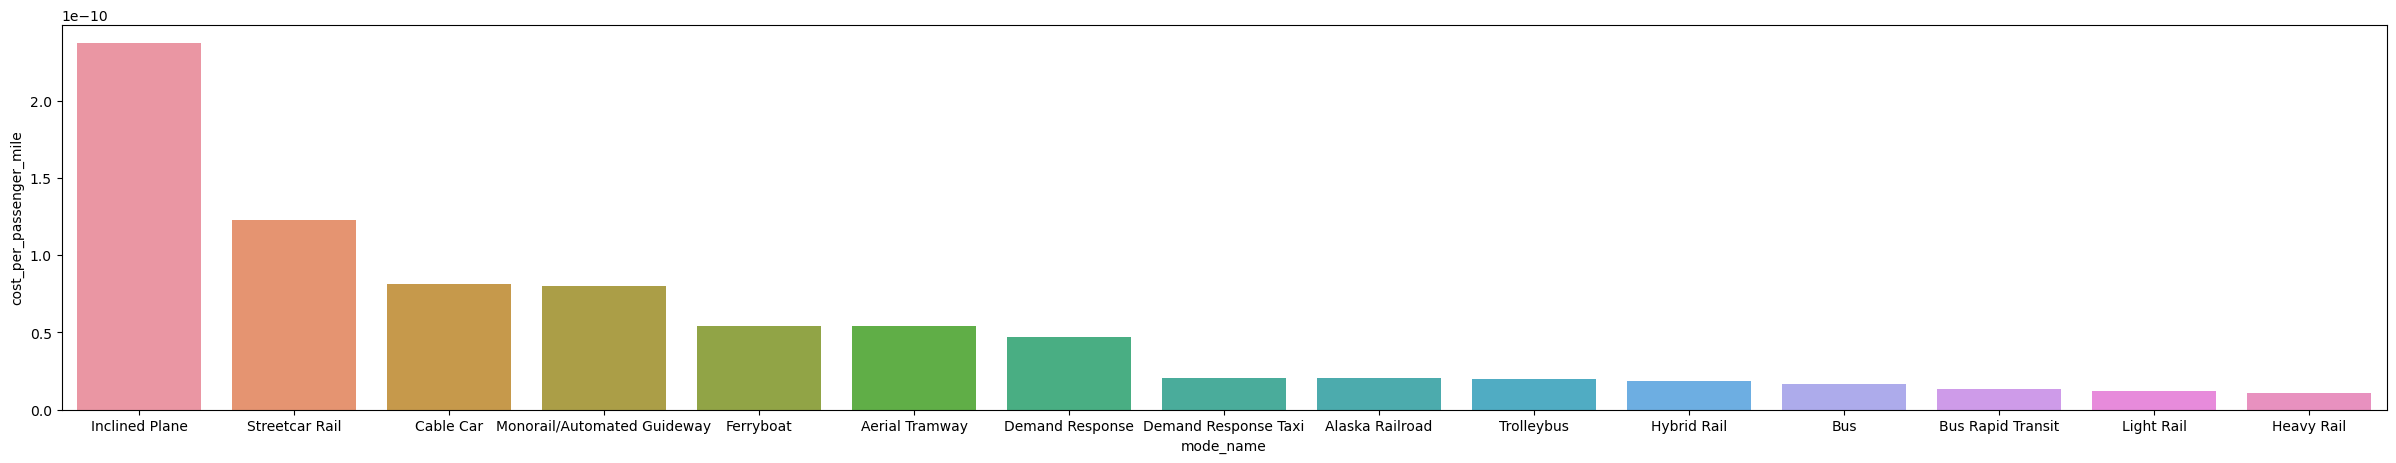

In [33]:
col = 'cost_per_passenger_mile'
modes = (df.groupby('mode_name')[col].mean().sort_values(ascending=False) / df.passenger_miles.sum()) \
    .reset_index() \
    .head(15)
plt.figure(figsize=(30, 5))
sns.barplot(data=modes, x='mode_name', y=col)

<Axes: xlabel='mode_name', ylabel='total_operating_expenses'>

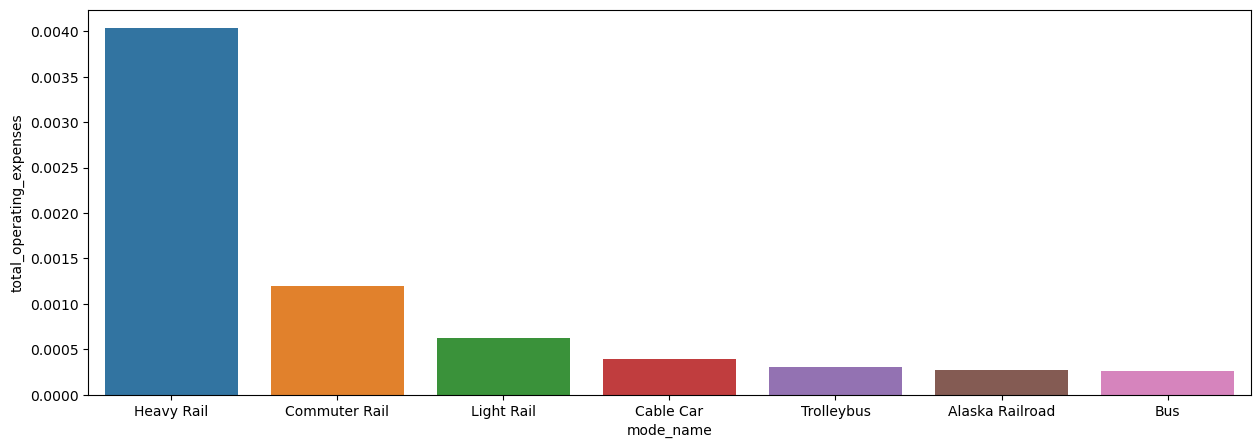

In [34]:
col = 'total_operating_expenses'
modes = (df.groupby('mode_name')[col].mean().sort_values(ascending=False) / df.passenger_miles.sum()) \
    .head(7) \
    .reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(data=modes, x='mode_name', y=col)

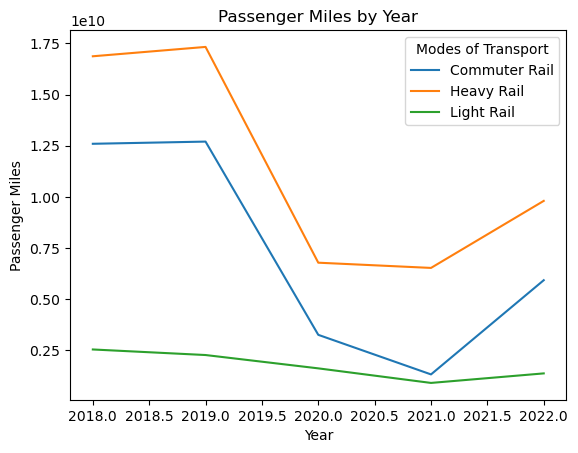

In [35]:
rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

sns.lineplot(rdf, x='year', y='passenger_miles', hue='mode_name')

plt.title('Passenger Miles by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Miles')
plt.legend(title='Modes of Transport')
plt.show()

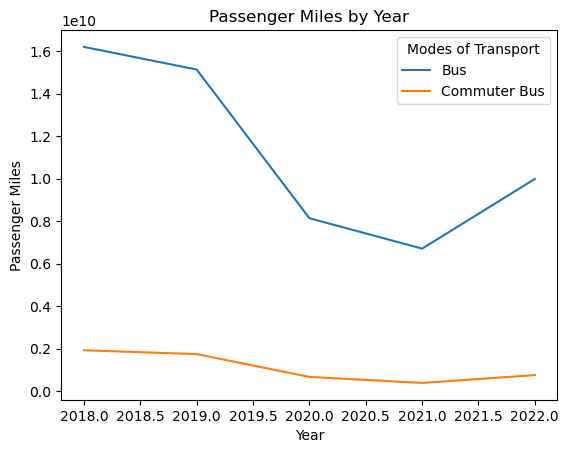

In [36]:
rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

sns.lineplot(rdf, x='year', y='passenger_miles', hue='mode_name')

plt.title('Passenger Miles by Year')
plt.xlabel('Year')
plt.ylabel('Passenger Miles')
plt.legend(title='Modes of Transport')
plt.show()

Heavy rail and commuter rail together make up half of all passenger miles traveled. On the other hand, bus travel represents about a third of miles traveled.

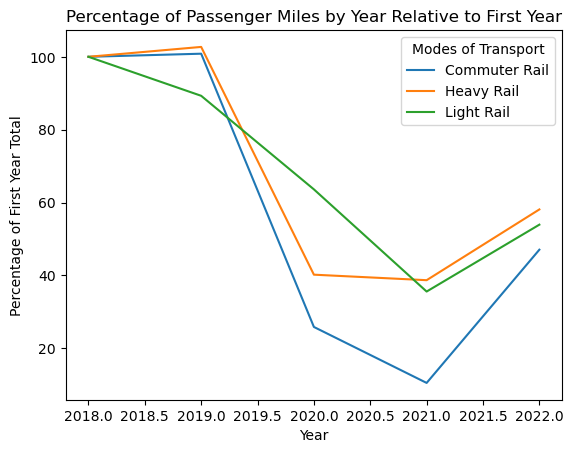

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').passenger_miles.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.passenger_miles / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.title('Percentage of Passenger Miles by Year Relative to First Year')
plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

In [38]:
df['miles_per_expense'] = df.passenger_miles / df.total_operating_expenses
df.select_dtypes(include=['number']).corr().total_operating_expenses.sort_values()

ntd_id                                                       -0.05
cost_per_passenger                                           -0.04
cost_per_passenger_mile                                      -0.03
fare_revenues_per_unlinked_passenger_trip                    -0.01
miles_per_expense                                            -0.00
year                                                          0.00
cost_per_hour                                                 0.05
fare_revenues_per_total_operating_expense_(recovery_ratio)    0.05
primary_uza_population                                        0.27
agency_voms                                                   0.58
unlinked_passenger_trips                                      0.87
passenger_miles                                               0.89
mode_voms                                                     0.90
fare_revenues_earned                                          0.90
vehicle_revenue_hours                                         

In [39]:
df.select_dtypes(include='number').corr().cost_per_passenger_mile.sort_values()

fare_revenues_per_total_operating_expense_(recovery_ratio)   -0.10
miles_per_expense                                            -0.10
mode_voms                                                    -0.04
vehicle_revenue_miles                                        -0.03
vehicle_revenue_hours                                        -0.03
total_operating_expenses                                     -0.03
fare_revenues_per_unlinked_passenger_trip                    -0.02
passenger_miles                                              -0.02
fare_revenues_earned                                         -0.02
unlinked_passenger_trips                                     -0.02
agency_voms                                                  -0.02
ntd_id                                                        0.01
primary_uza_population                                        0.02
year                                                          0.07
cost_per_hour                                                 

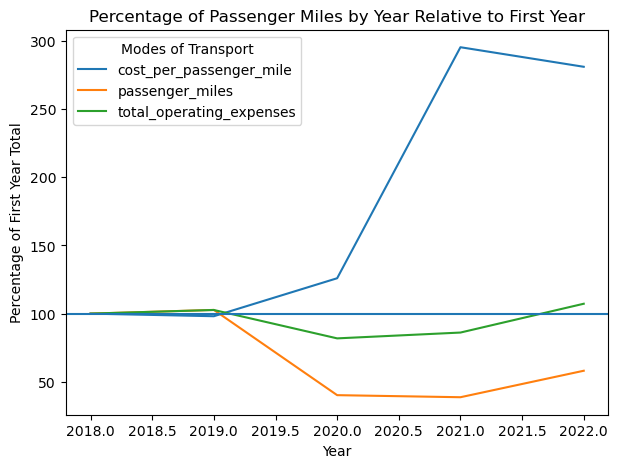

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

modes = ['Heavy Rail']
col1 = 'cost_per_passenger_mile'
col2 = 'passenger_miles'
col3 = 'total_operating_expenses'

rdf = df[df.mode_name.isin(modes)].copy()

pdf = rdf.groupby(['year', 'mode_name'])[col1].sum().reset_index()
cdf = rdf.groupby(['year', 'mode_name'])[col2].sum().reset_index()
odf = rdf.groupby(['year', 'mode_name'])[col3].sum().reset_index()

first_year_totals_p = rdf[rdf.year == rdf.year.min()].groupby('mode_name')[col1].sum()
first_year_totals_c = rdf[rdf.year == rdf.year.min()].groupby('mode_name')[col2].sum()
first_year_totals_o = rdf[rdf.year == rdf.year.min()].groupby('mode_name')[col3].sum()

pdf = pdf.merge(first_year_totals_p.rename('first_year_total'), on='mode_name')
cdf = cdf.merge(first_year_totals_c.rename('first_year_total'), on='mode_name')
odf = odf.merge(first_year_totals_o.rename('first_year_total'), on='mode_name')

pdf['percentage_of_first_year'] = (pdf[col1] / pdf.first_year_total) * 100
cdf['percentage_of_first_year'] = (cdf[col2] / cdf.first_year_total) * 100
odf['percentage_of_first_year'] = (odf[col3] / odf.first_year_total) * 100

plt.figure(figsize=(7, 5))

sns.lineplot(data=pdf, x='year', y='percentage_of_first_year', label=col1)
sns.lineplot(data=cdf, x='year', y='percentage_of_first_year', label=col2)
sns.lineplot(data=odf, x='year', y='percentage_of_first_year', label=col3)

plt.title('Percentage of Passenger Miles by Year Relative to First Year')
plt.axhline(100)
plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

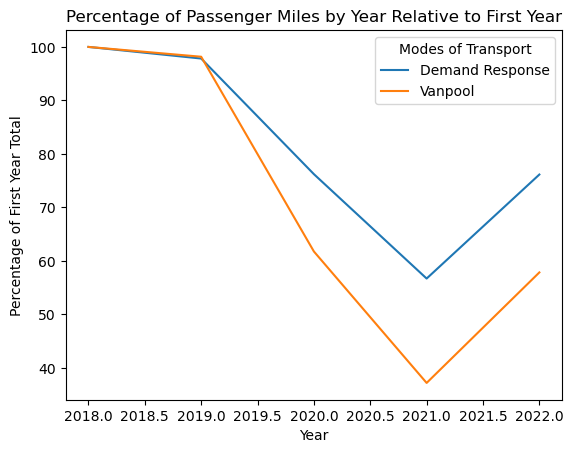

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Vanpool', 'Demand Response'])]
rdf = rdf.groupby(['year', 'mode_name']).passenger_miles.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').passenger_miles.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.passenger_miles / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.title('Percentage of Passenger Miles by Year Relative to First Year')
plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

Let's also look at it in terms of cost. 

,year,mode_name,cost_per_passenger_mile
0,2018,Commuter Rail,0.70
1,2018,Heavy Rail,0.94
2,2018,Light Rail,1.22


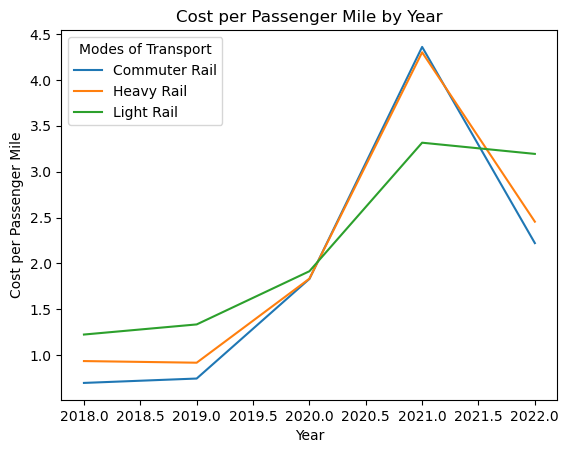

In [42]:
rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.mean().reset_index()

display(rdf.head(3))

sns.lineplot(rdf, x='year', y='cost_per_passenger_mile', hue='mode_name')

plt.title('Cost per Passenger Mile by Year')
plt.xlabel('Year')
plt.ylabel('Cost per Passenger Mile')
plt.legend(title='Modes of Transport')
plt.show()

,year,mode_name,cost_per_passenger_mile
0,2018,Bus,1.85
1,2018,Commuter Bus,0.66
2,2019,Bus,1.88
3,2019,Commuter Bus,0.69
4,2020,Bus,3.01
5,2020,Commuter Bus,1.15
6,2021,Bus,4.26
7,2021,Commuter Bus,2.63
8,2022,Bus,3.61
9,2022,Commuter Bus,2.05


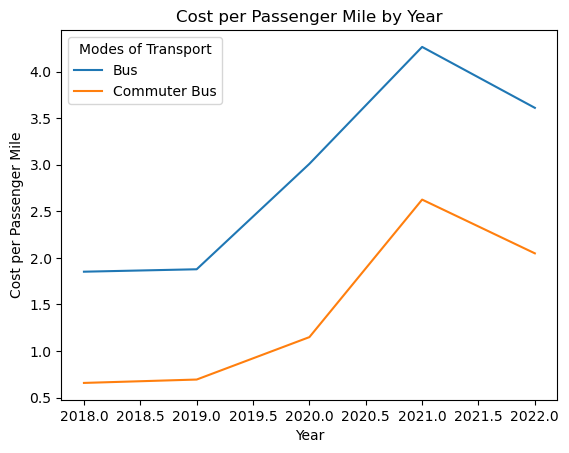

In [43]:
rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.mean().reset_index()

display(rdf)

sns.lineplot(rdf, x='year', y='cost_per_passenger_mile', hue='mode_name')

plt.title('Cost per Passenger Mile by Year')
plt.xlabel('Year')
plt.ylabel('Cost per Passenger Mile')
plt.legend(title='Modes of Transport')
plt.show()

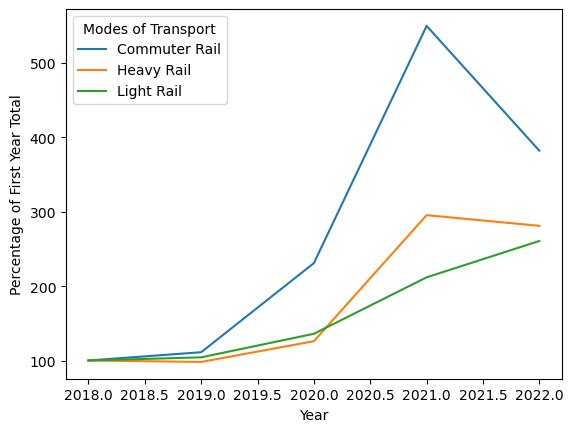

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').cost_per_passenger_mile.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.cost_per_passenger_mile / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

In [45]:
!pip install altair

In [46]:
import altair as alt

# Create a line chart with Altair
chart = alt.Chart(rdf).mark_line().encode(
    x='year:O',  # Treat year as an ordinal data type for discrete x-axis
    y=alt.Y('percentage_of_first_year:Q', title='Percentage of First Year Total'),
    color='mode_name:N',
    tooltip=['year:O', 'mode_name:N', 'percentage_of_first_year:Q']
).properties(
    title='Percentage of First Year Total by Mode of Transport Over Years'
)

chart.display()


alt.Chart(...)

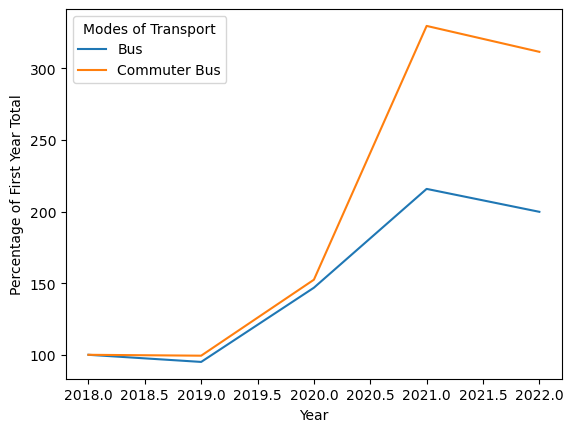

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

rdf = df[df.mode_name.isin(['Bus', 'Commuter Bus'])]
rdf = rdf.groupby(['year', 'mode_name']).cost_per_passenger_mile.sum().reset_index()

first_year_totals = rdf[rdf.year == rdf.year.min()].groupby('mode_name').cost_per_passenger_mile.sum()

rdf = rdf.merge(first_year_totals.rename('first_year_total'), on='mode_name')

rdf['percentage_of_first_year'] = (rdf.cost_per_passenger_mile / rdf.first_year_total) * 100

sns.lineplot(data=rdf, x='year', y='percentage_of_first_year', hue='mode_name')

plt.xlabel('Year')
plt.ylabel('Percentage of First Year Total')
plt.legend(title='Modes of Transport')
plt.show()

In [48]:
# sdf = df[df.mode_name == 'Bus'].copy()
# passenger_miles_mean = sdf.passenger_miles
# def bin_agencies()

In [49]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name,miles_per_expense
2181,"Woods Hole, Martha's Vineyard and Nantucket St...",Woods Hole,MA,10183,Independent Public Agency or Authority of Tran...,Full Reporter,246695.00,39.00,MB,DO,30.00,0.00,0.00,131.19,7.60,1.49,0.00,6514505.00,857547.00,49658.00,4372843.00,406263.00,2019,Bus,0.67


<Axes: xlabel='mode_voms', ylabel='fare_revenues_per_total_operating_expense_(recovery_ratio)'>

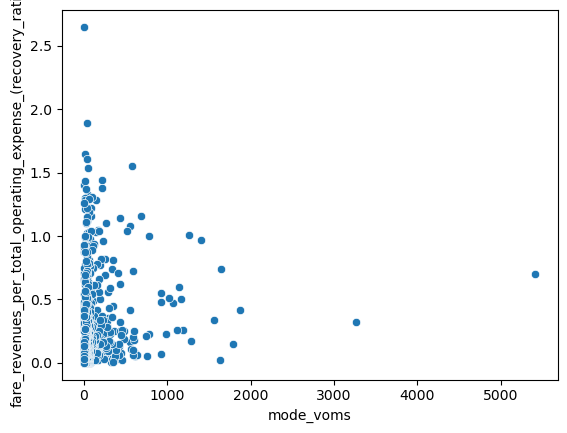

In [50]:
sns.scatterplot(data=df[df.year == 2019], x='mode_voms', y='fare_revenues_per_total_operating_expense_(recovery_ratio)')

In [51]:
pd.set_option('display.max_rows', 500)
mdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail', 'Bus', 'Commuter Bus'])]
pd.DataFrame(mdf.groupby(['mode_name', 'year'])['fare_revenues_per_total_operating_expense_(recovery_ratio)'].mean())

fare_revenues_per_total_operating_expense_(recovery_ratio)
mode_name     year                                                            
Bus           2018                                               0.17         
              2019                                               0.16         
              2020                                               0.11         
              2021                                               0.07         
              2022                                               0.08         
Commuter Bus  2018                                               0.35         
              2019                                               0.33         
              2020                                               0.24         
              2021                                               0.11         
              2022                                               0.17         
Commuter Rail 2018                                               0.39         
              2019                                               0.37         
              2020                                               0.23         
              2021                                               0.08         
              2022                                               0.14         
Heavy Rail    2018                                               0.41         
              2019                                               0.41         
              2020                                               0.24         
              2021                                               0.12         
              2022                                               0.18         
Light Rail    2018                                               0.22         
              2019                                               0.21         
              2020                                               0.15         
              2021                                               0.08         
              2022                                               0.10

In [52]:
pd.set_option('display.max_rows', 500)
mdf = df[df.mode_name.isin(['Heavy Rail', 'Commuter Rail', 'Light Rail', 'Bus', 'Commuter Bus'])]
pd.DataFrame(mdf.groupby(['mode_name', 'year'])['mode_voms'].sum())

mode_voms
mode_name     year           
Bus           2018   46105.00
              2019   43723.00
              2020   33251.00
              2021   34881.00
              2022   41795.00
Commuter Bus  2018    3385.00
              2019    3317.00
              2020    2712.00
              2021    1898.00
              2022    2366.00
Commuter Rail 2018    6269.00
              2019    6030.00
              2020    3122.00
              2021    2711.00
              2022    5548.00
Heavy Rail    2018    9427.00
              2019    9577.00
              2020    7487.00
              2021    7644.00
              2022    9264.00
Light Rail    2018    1695.00
              2019    1587.00
              2020    1589.00
              2021    1143.00
              2022    1380.00

c:\Users\jackv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


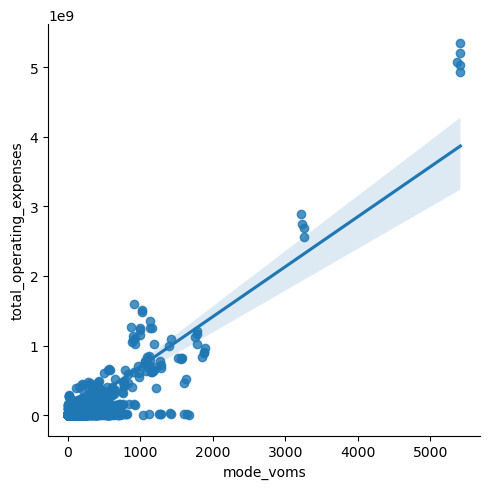

In [53]:
sns.lmplot(data=df, x='mode_voms', y='total_operating_expenses')

In [54]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name,miles_per_expense
2759,Riverside Transit Agency,Riverside,CA,90031,Independent Public Agency or Authority of Tran...,Full Reporter,1932666.00,298.00,DR,TX,16.00,5.58,0.21,54.17,26.43,2.22,46158.00,218632.00,8271.00,4036.00,98596.00,98596.00,2020,Demand Response,0.45


<Axes: >

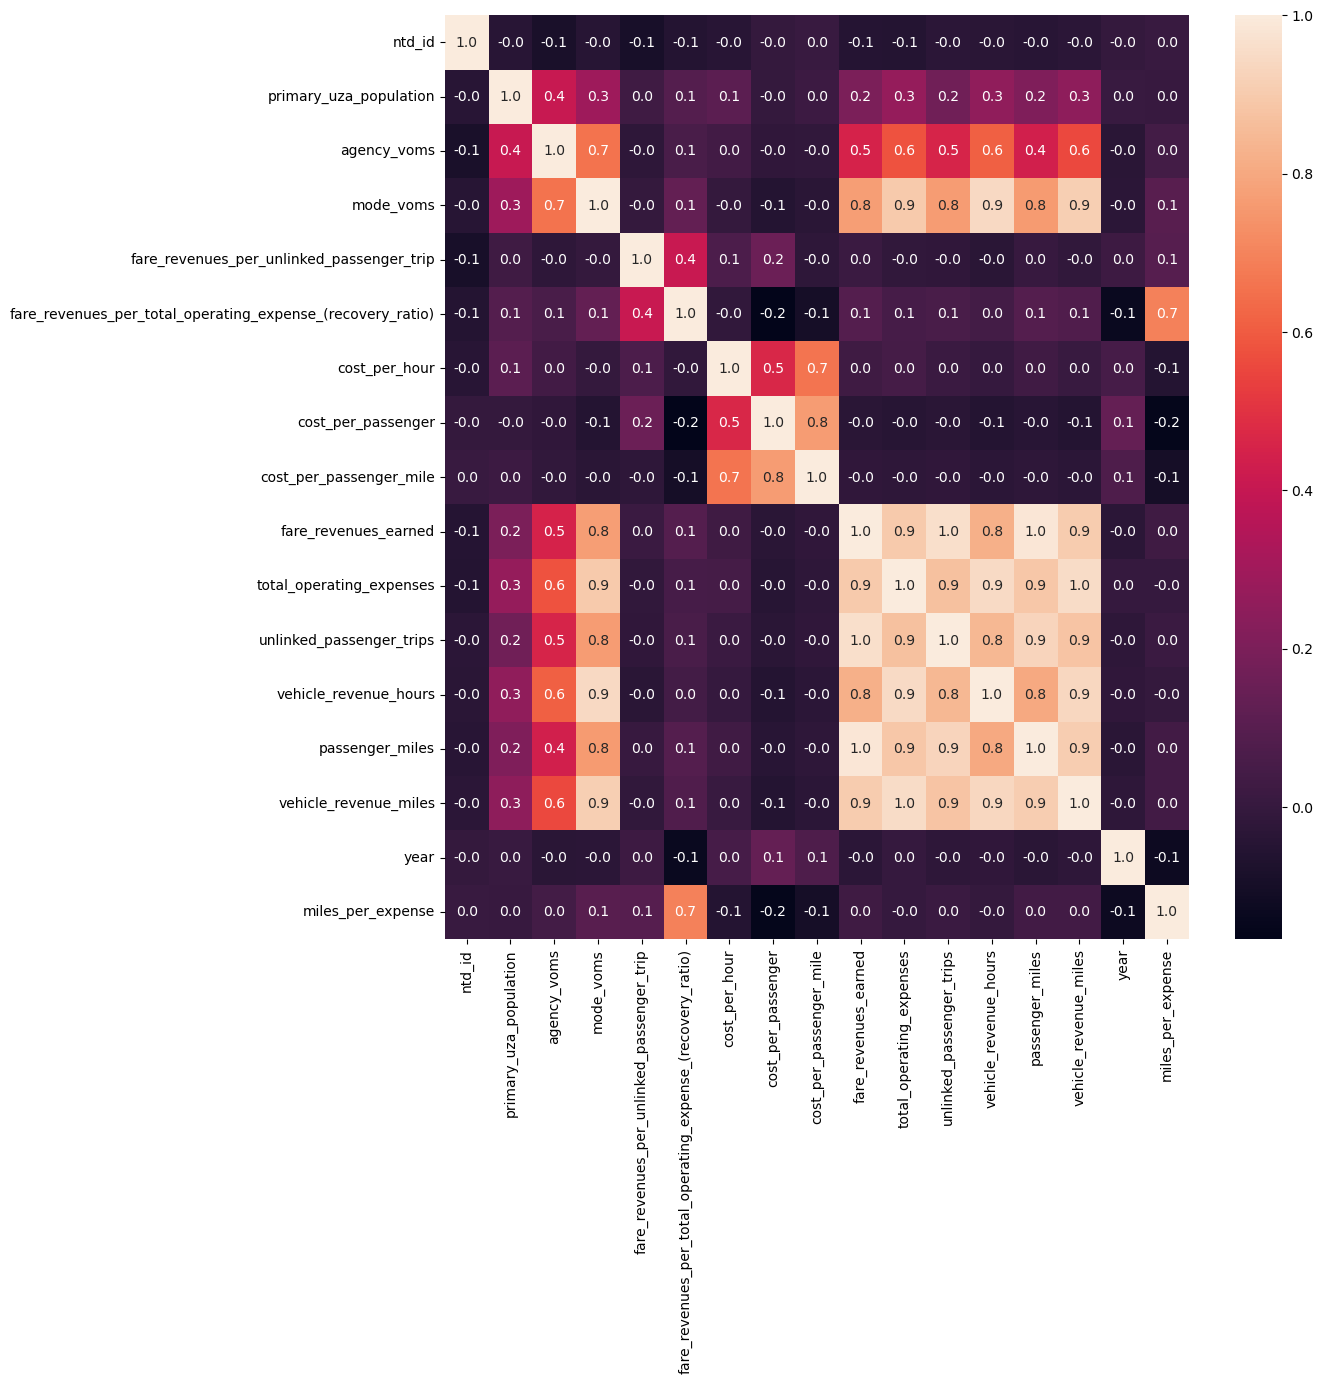

In [55]:
import numpy as np 

cdf = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 12))
sns.heatmap(cdf.corr(), annot=True, fmt='.1f')


In [56]:
df.sample()

,agency,city,state,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,year,mode_name,miles_per_expense
587,Hill Country Transit District,San Saba,TX,60091,Independent Public Agency or Authority of Tran...,Full Reporter,217630.00,91.00,MB,DO,10.00,0.63,0.10,93.82,6.61,1.10,277697.00,2922661.00,442325.00,31153.00,2650389.00,476521.00,2018,Bus,0.91


<Axes: xlabel='mode_name', ylabel='fare_revenues_per_total_operating_expense_(recovery_ratio)'>

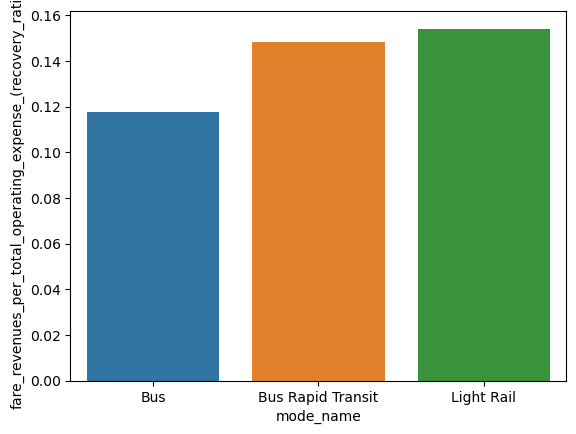

In [57]:
col = 'fare_revenues_per_total_operating_expense_(recovery_ratio)'
bdf = df[df.mode_name.isin(['Light Rail', 'Bus', 'Bus Rapid Transit'])].copy()
bdf = bdf.groupby(['mode_name'])[col].mean().reset_index()
sns.barplot(data=bdf, x='mode_name', y=col)

<Axes: xlabel='mode_name', ylabel='cost_per_passenger_mile'>

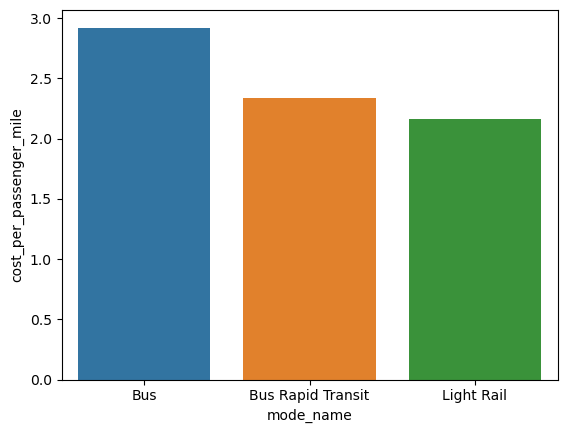

In [58]:
col = 'cost_per_passenger_mile'
bdf = df[df.mode_name.isin(['Light Rail', 'Bus', 'Bus Rapid Transit'])].copy()
bdf = bdf.groupby(['mode_name'])[col].mean().reset_index()
sns.barplot(data=bdf, x='mode_name', y=col)

<Axes: xlabel='mode_name', ylabel='total_operating_expenses'>

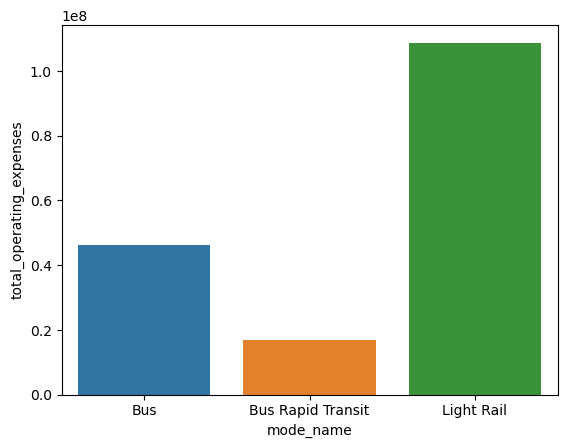

In [59]:
col = 'total_operating_expenses'
bdf = df[df.mode_name.isin(['Light Rail', 'Bus', 'Bus Rapid Transit'])].copy()
bdf = bdf.groupby(['mode_name'])[col].mean().reset_index()
sns.barplot(data=bdf, x='mode_name', y=col)

<Axes: xlabel='mode_name', ylabel='fare_revenues_earned'>

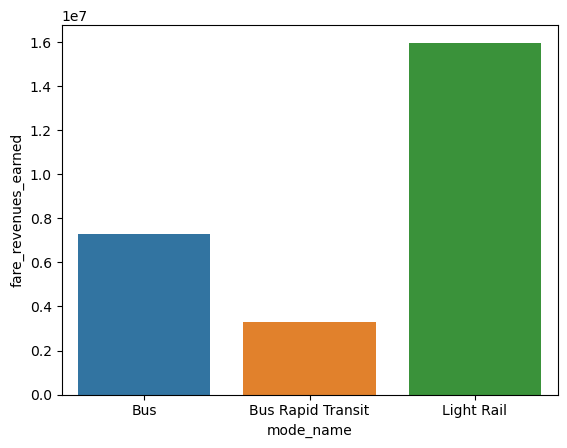

In [60]:
col = 'fare_revenues_earned'
bdf = df[df.mode_name.isin(['Light Rail', 'Bus', 'Bus Rapid Transit'])].copy()
bdf = bdf.groupby(['mode_name'])[col].mean().reset_index()
sns.barplot(data=bdf, x='mode_name', y=col)